 # Data Mining im Bankenumfeld

### 1- Importieren von Bibliotheken und Excel-Dateien 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_csv('bank_marketing_adal_v1.0.csv',sep=";")
df.columns = ['Alter','Beruf','Familienstand','Ausbildung','Ausgefallen','Kontostand','Eigentum','Darlehen','Dauer','Label']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Alter          20493 non-null  int64 
 1   Beruf          20493 non-null  object
 2   Familienstand  20493 non-null  object
 3   Ausbildung     20493 non-null  object
 4   Ausgefallen    20493 non-null  int64 
 5   Kontostand     20493 non-null  int64 
 6   Eigentum       20493 non-null  int64 
 7   Darlehen       20493 non-null  int64 
 8   Dauer          20493 non-null  int64 
 9   Label          20493 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.6+ MB
None


,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
0,31,Freiberufler,verheiratet,Allgemeine Hochschulreife,0,162,1,1,0,1
1,28,Beamter,verheiratet,Allgemeine Hochschulreife,0,1595,0,0,1,0
2,39,Techniker,geschieden,Allgemeine Hochschulreife,0,17441,1,1,1,1
3,54,Arbeitslos,geschieden,Allgemeine Hochschulreife,0,925,0,0,2,0
4,24,Techniker,ledig,Allgemeine Hochschulreife,0,-156,1,0,4,0


### 2- Eingabe- und Ausgabedaten trennen

In [3]:
X = df.drop(['Label'], axis=1)
y = df['Label']
print(y.value_counts())

0    15620
1     4873
Name: Label, dtype: int64


### 3- Bestimmen der Anzahl fehlender Daten in der Spalte

In [4]:
counter = 0
for i in range(20493):
    if X.loc[i,'Beruf'] == 'unbekannt':
        counter += 1 
print(counter)    

4535


### 4- Löschen von Spalten, da fehlende Daten mehr als 20% betragen.

Erläuterung: Die Menge der fehlenden Daten in der Zeile im Datensatz bildet den Durchschnitt der Spalte. Aus diesem Grund können wir die fehlenden Daten nicht mit einem Durchschnittswert füllen. Das Löschen dieser Anzahl von Zeilen kann die 0-1-Verteilungen in der Ergebnismenge beeinträchtigen.

0, es gibt 15620 im Datensatz. (Zieldaten)

1, es gibt 4873 im Datensatz. (Zieldaten)

Aus diesem Grund löschen wir die Spalte mit einer so großen Menge fehlender Daten.

In [5]:
X = df.drop(['Beruf','Label'], axis=1)

### 5- Unvollständige Daten mit Spalten mittelwert füllen
Erläuterung: Das Auffüllen mit dem Mittelwert ist kein Problem, da die Varianz der Daten nicht beeinflusst wird.


In [6]:
X['Ausbildung'].describe()

count                         20493
unique                            4
top       Allgemeine Hochschulreife
freq                          10522
Name: Ausbildung, dtype: object

In [7]:
for i in range(20493):
    if X.loc[i,'Ausbildung'] == 'unbekannt':
        X.loc[i,'Ausbildung'] = 'Allgemeine Hochschulreife'
    else:
        X.loc[i,'Ausbildung'] = X.loc[i,'Ausbildung']

### 6- Konvertieren von Objektdatentypen in numerische Werte.
Erläuterung: Wir können nur numerische Daten im Algorithmus bearbeiten. Aus diesem Grund konvertieren wir zuerst den Datentyp der als "Objekt"definieren Spalten in eine Kategorie und dann die kategorialen Daten in numerische Daten. Es gibt mehrere Methoden, die hier verwendet können. One Hot-Codierung wurde nicht bevorzugt, da eine One Hot-Codierung die Anzahl der Spalten im Eingabesatz und die Anzahl der Überanpassung Spalten erhöht.


In [8]:
X['Familienstand'] = X['Familienstand'].astype('category')
X['Ausbildung'] = X['Ausbildung'].astype('category')
X['FamilienstandLE'] = X['Familienstand'].cat.codes
X['AusbildungLE'] = X['Ausbildung'].cat.codes
X = X.drop(['Familienstand','Ausbildung'], axis = 1)
X.head()

,Alter,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,FamilienstandLE,AusbildungLE
0,31,0,162,1,1,0,2,0
1,28,0,1595,0,0,1,2,0
2,39,0,17441,1,1,1,0,0
3,54,0,925,0,0,2,0,0
4,24,0,-156,1,0,4,1,0


### 7- Normalisierung von Daten
Erläuterung: Die Wertbereiche der numerischen Werte im Datensatz untercheiden sich voneinander. Dies führt dazu, dass das Training des Modells zu lange dauert und manchmal nicht das richtige Ergebnis erzielt. Aus diesem Grund skalieren wir die Daten zwischen 0 und 1. Der Standardisierungsprozess könnte auch hier angewendet werden. Eine Normalisierung wurde jedoch bevorzugt, da sie in den meisten Fällen bessere Ergebnisse liefert.


In [9]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [10]:
X = normalize(X)

In [11]:
X.head(30)

,Alter,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,FamilienstandLE,AusbildungLE
0,0.254902,0.0,0.175485,1.0,1.0,0.000000,1.0,0.0
1,0.196078,0.0,0.235089,0.0,0.0,0.000407,1.0,0.0
2,0.411765,0.0,0.894185,1.0,1.0,0.000407,0.0,0.0
3,0.705882,0.0,0.207221,0.0,0.0,0.000814,0.0,0.0
4,0.117647,0.0,0.162258,1.0,0.0,0.001629,0.5,0.0
5,0.176471,0.0,0.165876,0.0,0.0,0.001629,0.5,0.0
6,0.431373,0.0,0.169370,0.0,1.0,0.001629,0.5,0.5
7,0.235294,0.0,0.169620,0.0,0.0,0.001629,0.5,0.5
8,0.098039,0.0,0.170535,0.0,0.0,0.001629,0.5,0.0
9,0.176471,0.0,0.172615,0.0,0.0,0.001629,0.5,1.0


### 8- Auflistung der Parameter des Random Forest-Algorithmus 

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=4711)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4711,
 'verbose': 0,
 'warm_start': False}


### 9- Bestimmen der Parameterwerte,mit denen wir das beste Ergebnis erzielen.
Erläuterung: Die Anzahl der Bäume kann zwischen 100 und 2000 20 verschiedene Werte annehmen, max_feature kann alle Spalten oder eine unterschiedliche Anzahl von spalten annehmen, kann Werte von max_depth 1 bis zur Anzahl der Spalten in Trainingsdaten annehmen, kann Werte von min_samples_split 2,5 und 8 annehmen, min samples_leaf 1, 2 und 4 Bootstrap kann wahr oder falsch sein. Der Grund dafür ist, dass wir die kompatibelsten Parameter ermitteln können, mit denen wir die höchste Genauigkeit erzielen können. Dabei verwenden wir RandomizedSearchCV in der sklearn-Bibliothek.
 

In [13]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 8, num = 8)]
max_depth.append(None)
min_samples_split = [2, 5, 8]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


### 10- Mit RandomizedSearchCV erstellen wir Übereinstimmungen in dem oben definierten Parametersatz und ermitteln die kompatibelsten und besten Ergebnisparameter. 
Wir suchen nach den kompatibelsten Parametern, indem wir die daten mit cv = 3 durch 3 teilen und mit n_iter = 100 100 verschiedene Übeereinstimmungen in jedem Stück erstellen. Dann teilen wir die Daten in Zug- unda Testsätze auf, sodass der Testdatensatz 30% beträgt. rf_random Modell mit den besten Parametern. Wir passen unseren Datensatz an rf_random an.
 

In [14]:
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4711, n_jobs = -1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4711, shuffle= True)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                  

In [15]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': False}

### 11- Visualisierung von Random Forest Decision Tree 

In [37]:
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

d_tree99 = rf_random.best_estimator_[99]
dot_data1 = StringIO()
export_graphviz(d_tree99, feature_names = X.columns,
               out_file = dot_data1, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph.write_png('rf_5b.png')
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00@\xdf\x00\x00\x04\xa7\x08\x06\x00\x00\x00\xb3\x8f\xb4…

### 12- Durchführen des Bewertungsprozesses:
a- Basismodell, Modell, bei dem wir nicht die besten Parameter angeben

b- Baster Zufall, das Modell, in dem die besten Parameter angewendet werden

Der Testdatensatz wird auf beide Modelle angewendet und die Genauigkeitswerte beider Modelle werden verglichen

 

In [16]:
from sklearn.metrics import accuracy_score 

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    errors = abs(predictions - y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 100, random_state = 4711)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.1838 degrees.
Accuracy = 0.82%.
Model Performance
Average Error: 0.1786 degrees.
Accuracy = 0.82%.
Improvement of 0.64%.


In [17]:
treenew = RandomForestClassifier(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto',max_depth=8,
                            bootstrap=False,random_state = 4711)
treenew.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=8, n_estimators=400,
                       random_state=4711)

### 13- Vergleich der Predicted Values und Actual Values mit der Confusion Matrix
Confusion Matrix, eine Leistungsmessung, ist eine Tabelle mit 4 verschiedenen Kombinationen von Actual Values und Predicted Values. X_Test enthält die Schätzungen, die wir aus dem Prozess erhalten. y_test sind echte Werte.
Mit dem Pyplot kann Confusion Matrix visualisiert werden.

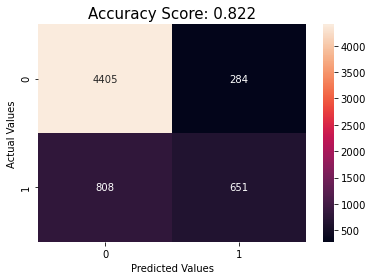

In [18]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

predictions = treenew.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

### 14- Die Genauigkeit des zum Testen der oben erstellten Testparameter gefundenen Werts wurde überprüft.
Wir haben geprüft, ob es einen besseren Wert gibt

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 6, 7, 8],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [31]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.2min finished


Model Performance
Average Error: 0.1776 degrees.
Accuracy = 0.82%.
Improvement of 0.76%.


In [32]:
base_accuracy

0.8162003903708523

In [33]:
best_random.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 15- Nutzung von "classification_report"
Wir haben classification_report mit y_test und precision erstellt.

Es gibt vier Möglichkeiten, um zu überprüfen, ob die Vorhersagen richtig oder falsch sind: True Positive, True Negative, Falsch Positive, Falsch Negative.

Precision: Genauigkeit positiver Vorhersagen. Precision = TP / (TP + FP)

Recall : Recall ist die Fähigkeit eines Klassifikators, alle positiven Instanzen zu finden. Recall = TP / (TP + FN)

F1 Score: Die Punktzahlen geben die Genauigkeit der Klassifizierer 

In [34]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.8450    0.9394    0.8897      4689
           1     0.6963    0.4462    0.5439      1459

    accuracy                         0.8224      6148
   macro avg     0.7706    0.6928    0.7168      6148
weighted avg     0.8097    0.8224    0.8076      6148



In [35]:
A = df.drop(['Beruf','Label'], axis=1)

### 16- Visualisierung
Zusammen mit den von uns erstellten Informationen (Präzision, Rückruf, F1-Score, Unterstützung) haben wir die Spalten des RandomForestClassifier in der Reihenfolge ihrer Wichtigkeit visualisiert.

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4689
           1       0.70      0.43      0.53      1459

    accuracy                           0.82      6148
   macro avg       0.77      0.69      0.71      6148
weighted avg       0.81      0.82      0.81      6148



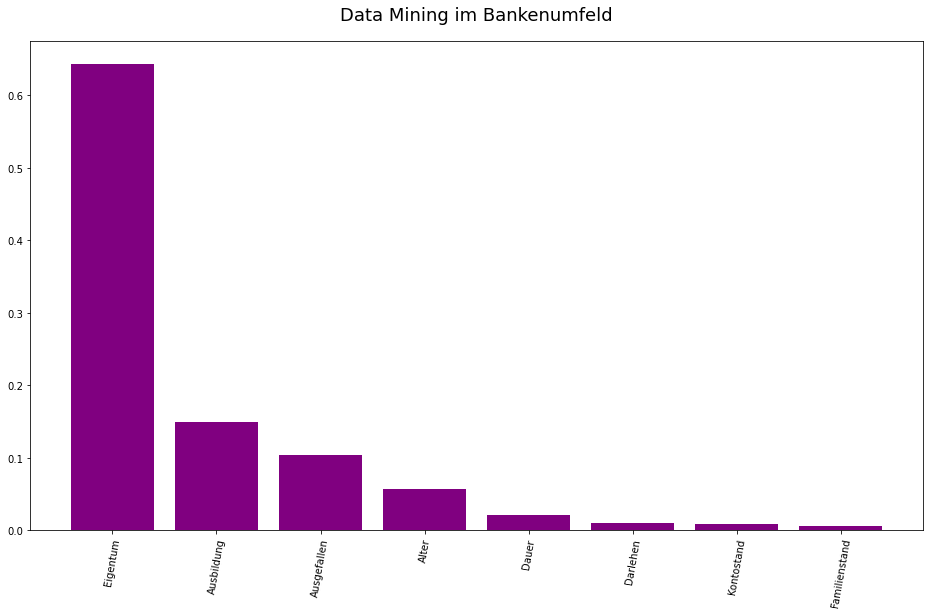

In [36]:
rf = RandomForestClassifier(bootstrap=True,ccp_alpha =0.0,class_weight=None,criterion='gini', max_depth=8,max_features= 'auto',
 max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=400,n_jobs=None,oob_score=False,random_state=4711,verbose=0,warm_start=False)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print(classification_report(y_test, predictions))
plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = A.columns

plt.title("Data Mining im Bankenumfeld", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="purple", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()